In [23]:
# ライブラリのインポート

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
import math
from sklearn.linear_model import LinearRegression

print("libraries imported")

libraries imported


(30,)
(30,)


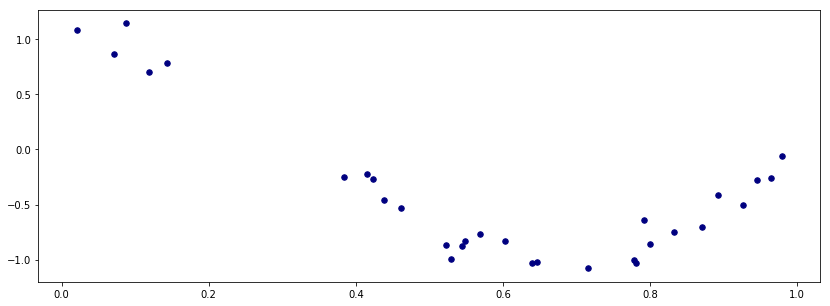

In [24]:
## 扱うデータ (x, y)
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))


print(x.shape)
print(y.shape)

x_plot = np.linspace(0, 1, 100)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

plt.show()

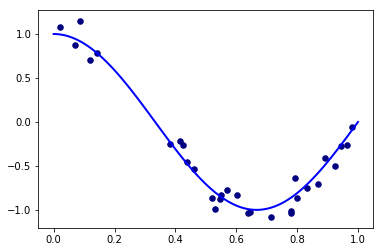

In [29]:
# 自分でフィットする関数を作ってみる
def predict(X):
    return [predict_point(x) for x in X]

# math.sin(x)を使わないでフィットする式を立ててみる
def predict_point(x):
    return np.cos(1.5 * np.pi * x)

plt.clf()
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

y_plot = predict(X_plot)
plt.plot(x_plot, y_plot, color='blue', linewidth=lw, label="Handmade Prediction")

plt.show()

/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[ 0.53668033]


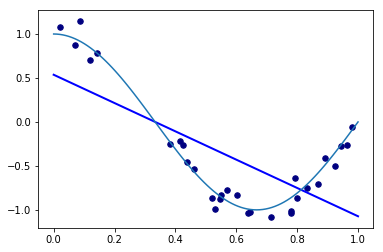

In [19]:
## 1次元の線形回帰

reg = LinearRegression()
reg.fit(X, y)


## 予測
print(reg.predict([0]))

## Plot
plt.clf()
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

y_plot = reg.predict(X_plot)
plt.plot(x_plot, y_plot, color='blue', linewidth=lw, label="Handmade Prediction")
plt.plot(X_test, true_fun(X_test), label="True function")

plt.show()

[ 1.54114869]


/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


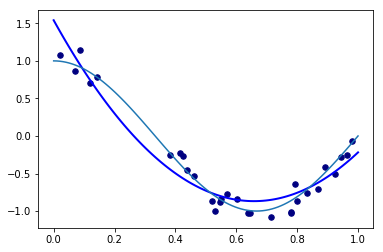

In [20]:
## 2次元の線形回帰

## 高次元の特徴量を追加する。x*xを追加
reg = make_pipeline(PolynomialFeatures(2), LinearRegression())
reg.fit(X, y)

## 予測
print(reg.predict([0]))

## Plot
plt.clf()
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

y_plot = reg.predict(X_plot)
plt.plot(x_plot, y_plot, color='blue', linewidth=lw, label="Handmade Prediction")
plt.plot(X_test, true_fun(X_test), label="True function")

plt.show()

score Y=f(x, degree=2)= 0.930800785988


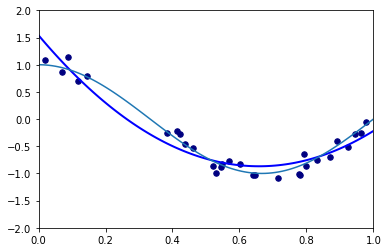

score Y=f(x, degree=3)= 0.97091601152


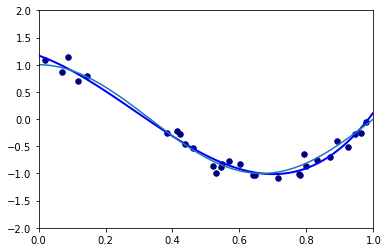

score Y=f(x, degree=4)= 0.973054474819


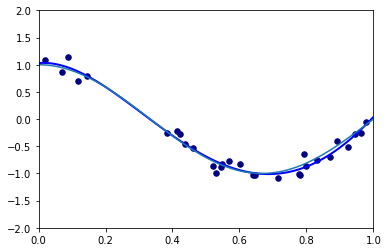

score Y=f(x, degree=5)= 0.974433321865


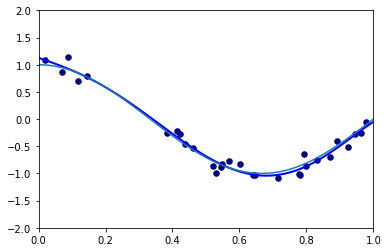

score Y=f(x, degree=6)= 0.974729771213


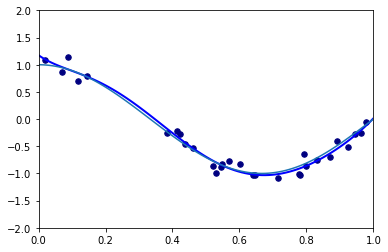

score Y=f(x, degree=7)= 0.975058493544


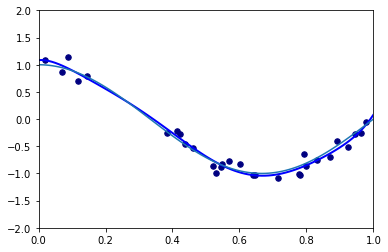

score Y=f(x, degree=8)= 0.975075084549


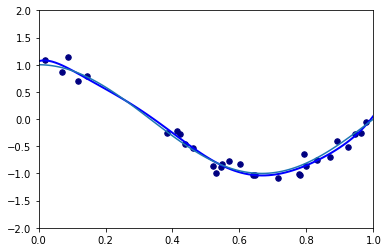

score Y=f(x, degree=9)= 0.97599726261


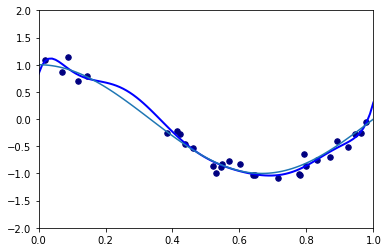

score Y=f(x, degree=10)= 0.976689563447


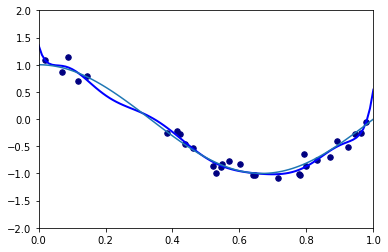

score Y=f(x, degree=11)= 0.977440316889


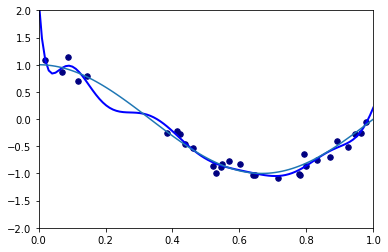

score Y=f(x, degree=12)= 0.97780316278


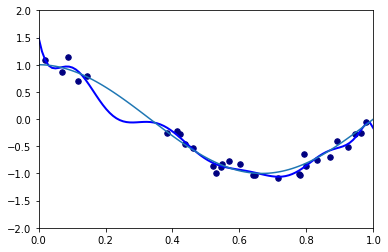

score Y=f(x, degree=13)= 0.978303813016


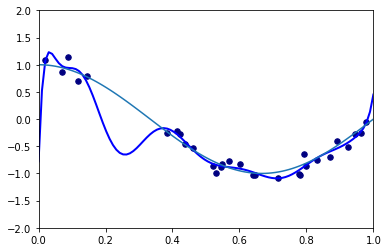

score Y=f(x, degree=14)= 0.983010709108


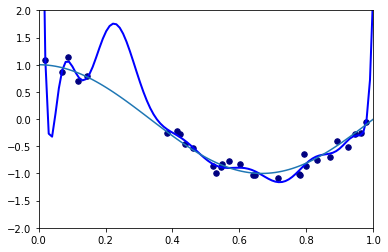

In [22]:
## 1次元の線形回帰
# create matrix versions of these arrays
X = x[:, np.newaxis]

for degree in range(2, 15):
    ## 高次元の特徴量を追加する。
    reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    reg.fit(X, y)
    
    print("score Y=f(x, degree={0})=".format(degree), reg.score(X, y))
    
    ## Plot
    plt.clf()
    plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

    y_plot = reg.predict(X_plot)
    plt.plot(x_plot, y_plot, color='blue', linewidth=lw, label="Handmade Prediction")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    
    plt.show()